In [2]:
%load_ext autoreload
%autoreload 2


In [12]:
import librosa
import librosa.display
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import sys

np.set_printoptions(threshold=sys.maxsize, suppress=True)


In [14]:
import IPython
from util.draw import draw_filtered

recording_file = "samples/record.wav"
music_file = "samples/music.wav"

recording, sr = librosa.load(recording_file)
music, sr = librosa.load(music_file)

IPython.display.Audio(recording_file)


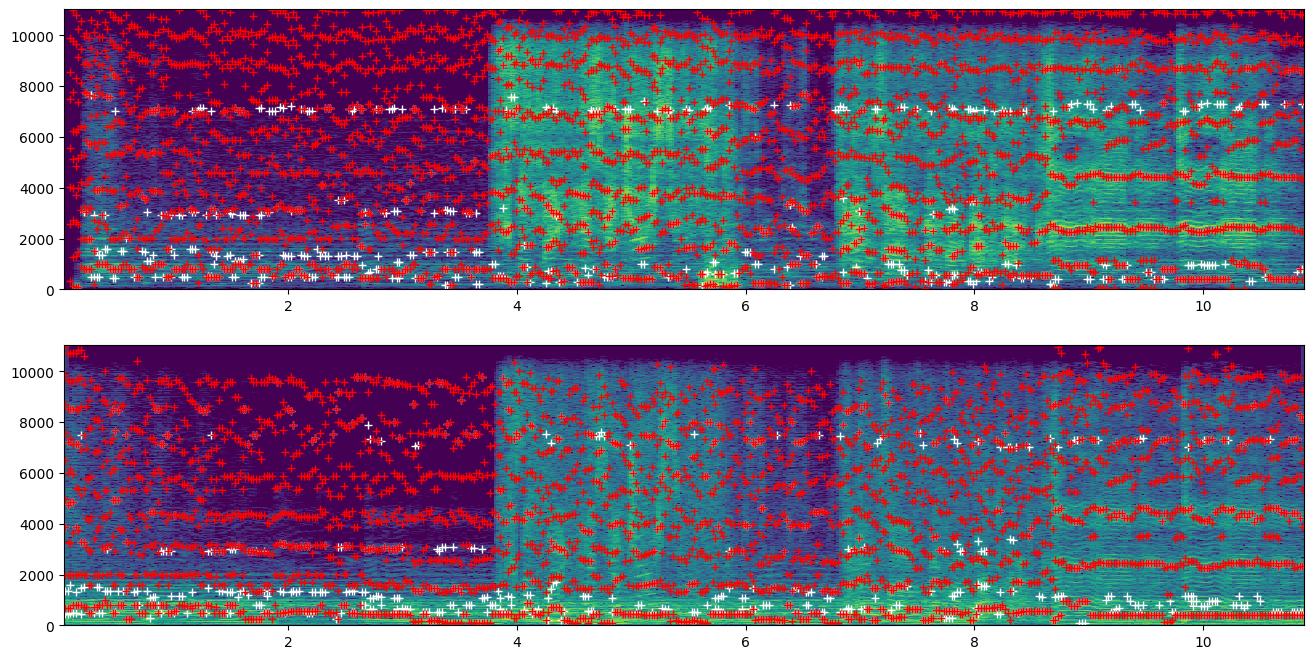

In [23]:
from freq.prominence import get_peak_frequencies_prominence as prominence
from freq.bands import get_peak_frequencies_bands as bands

fig, axs = plt.subplots(2, 1, figsize=(16, 8))

music_offset = int(sr * 4.25)
music_sample = music[music_offset: music_offset + recording.shape[-1]]

draw_filtered(
    recording, [
        (bands, {"marker": "+", "c": "w"}),
        (prominence, {"marker": "+", "c": "r"}),
    ], fig=axs[0]
)

draw_filtered(
    music_sample, [
        (bands, {"marker": "+", "c": "w"}),
        (prominence, {"marker": "+", "c": "r"}),
    ], fig=axs[1]
)

IPython.display.Audio(data=music_sample, rate=sr)


In [6]:
from hash.cluster import get_hashes_from_peaks_cluster as cluster
from util.compare import compare_fingerprints


hash_kwargs = {
    "window_size": 3,
    "gap_size": 0
}

music_peaks = cluster(
    prominence(music),
    **hash_kwargs
)
music_sample_peaks = cluster(
    prominence(music_sample),
    **hash_kwargs
)
recording_peaks = cluster(
    prominence(recording),
    **hash_kwargs
)

display(compare_fingerprints(music_peaks, recording_peaks))
display(compare_fingerprints(music_sample_peaks, recording_peaks))


(39, 0.01043338683788122)

(37, 0.011287370347773032)